In [1]:
# Purpose of the Hack
# Use Calgary open data and basic perceptron algorithm to build predictive weighting
# Can determine based on a month, day, and other attributes whether the record is for a Fire
#
# Data Source
# City of Calgary
# Last Updated: Sept 14, 2017
# Total Records: 17,510
# Accessed at: https://data.calgary.ca/Government/Fire-Emergency-Response-Calls/bdez-pds9

In [2]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def codeToBinary(code):
    """
    Input
    ---
    code : takes category code for Major Incident Type
    
    Output
    ---
    binary : 1 if fire, -1 if not fire
    """
    if code == 1.0:
        return 1
    else:
        return -1

In [4]:
df = pd.read_csv("Fire_Emergency_Response_Calls.csv")
del df['id']
# df.groupby(['date']).sum()['Incident Count'].plot()
# df.groupby(['date']).sum()['Incident Count']
# df[df['Major Incident Type']=='Fire']
df['Major Incident Code'] = df['Major Incident Type'].astype('category')
category_columns = df.select_dtypes(['category']).columns
# df.dtypes
df['Major Incident Code'].cat.codes # use to check that Fire is code 1
df[category_columns] = df[category_columns].apply(lambda x: x.cat.codes)
# df['Is Fire'] = df['Major Incident Code'].apply(codeToBinary)
del df['date']
del df['Major Incident Type']
# del df['Is Fire']
df

y = pd.DataFrame(df['Major Incident Code'].apply(codeToBinary))
y = y.rename(columns={'Major Incident Code' : 0})

w = pd.Series(np.zeros(len(df.transpose())))

del df['Major Incident Code']
df = df.rename(columns={'Alarm Year': 0, 'Alarm Month': 1,  'Alarm Day': 2, 'Incident Count': 3})

In [5]:
def perceptron(X, y, w, b, max_pass):
    """
    Perceptron Algorithm

    Parameters
    ---
    X : Training set in R^(n x d)
    y : True values {-1, 1}^n
    w : empty 0^d weight array
    b : bias
    max_pass : number of passes of training set

    Output
    ---
    w : fully trained weight classifying function
    b : bias
    mistake : array[max_pass] of number of predictions (<wX_i> + b) that didn't match truth value (y_i)
    """
    # Initialize values
    attributes = len(X.columns)
    X[attributes] = y
    X = X.transpose()
    w[attributes] = b
    mistake = [0] * max_pass
    n = len(X.columns)

    for i in range(0,max_pass):
        mistake[i] = 0
        for j in range(0,n):
            prediction = y[0][j] * ( X[j].dot(w) )
            if prediction <= 0:
                mistake[i] += 1
            yx = X.loc[:,j] * y[0][j]
            w = w + yx
            b = b + y[0][j]
    return (mistake, w, b)

In [6]:
mistake, trained_weight, trained_bias = perceptron(df, y, w, 0, 500)

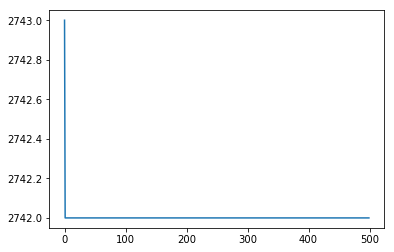

In [7]:
plot(mistake)

In [10]:
# prediction = y[0][j] * ( X[j].dot(w) )
trained_weight

0   -1.210677e+10
1   -3.830300e+07
2   -9.417950e+07
3   -1.990125e+08
4    8.755000e+06
dtype: float64